## 可视化决策树的方式

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
# 加载数据集
dataset = load_iris() 
# 转换成.DataFrame形式
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
# 添加品种列
df['Species'] = dataset.target

# 用数值替代品种名作为标签
target = np.unique(dataset.target)
target_names = np.unique(dataset.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

# 提取数据和标签
X = df.drop(columns="Species")
y = df["Species"]
feature_names = X.columns
labels = y.unique()

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.4,
                                                 random_state = 42)
model = DecisionTreeClassifier(max_depth =3, random_state = 42)
model.fit(X_train, y_train)                                         

DecisionTreeClassifier(max_depth=3, random_state=42)

### 文字表示

In [7]:
# 以文字形式输出树     
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



### plot_tree函数

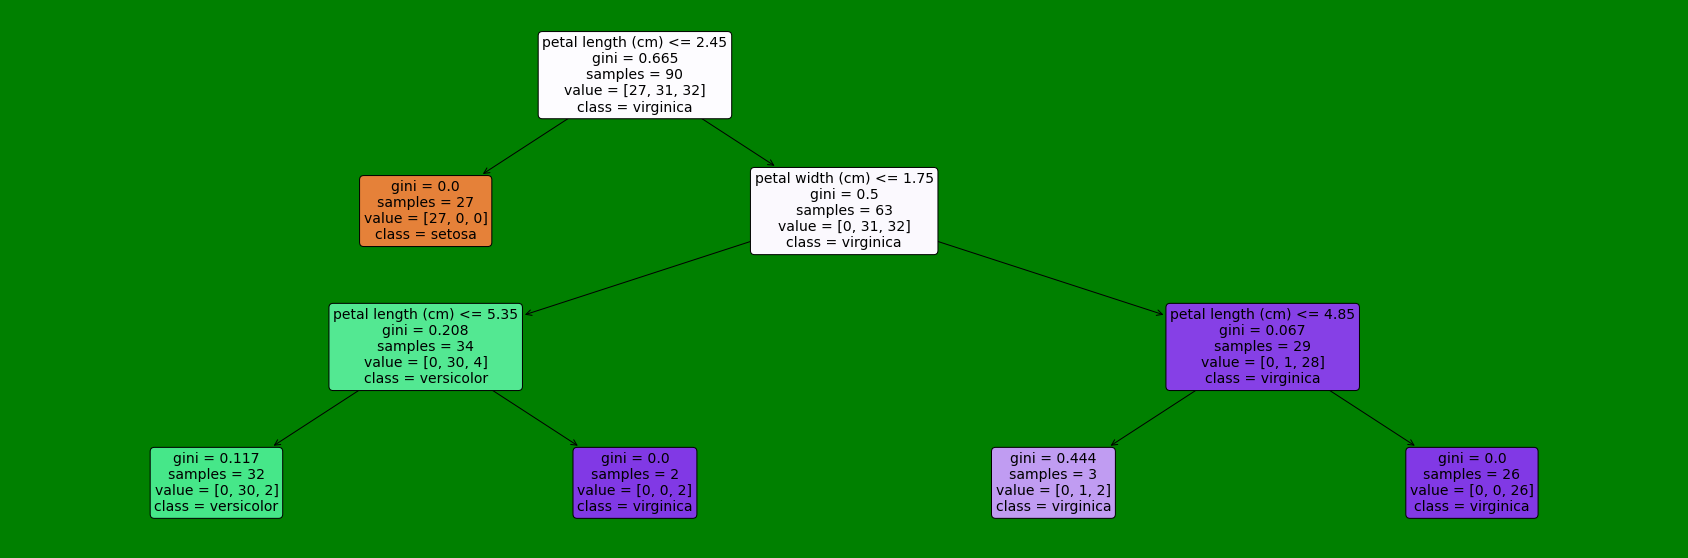

In [9]:
# 用图片画出
plt.figure(figsize=(30,10), facecolor ='g') #
a = tree.plot_tree(model,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()  

### graphviz模块

该模块需要安装graphviz，推荐在ubuntu上```sudo apt install graphviz```或者Mac上```brew install graphviz```

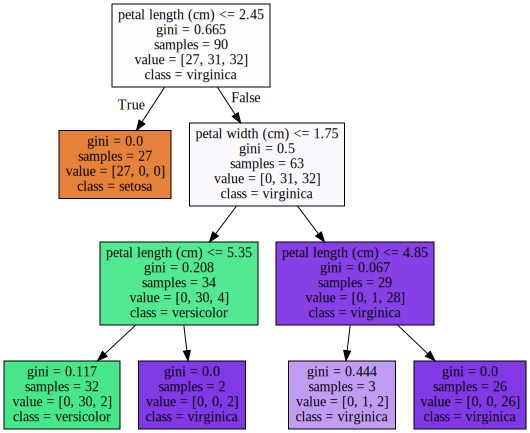

In [18]:

dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=dataset.feature_names,  
                                class_names=dataset.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### dtreeviz模块

In [28]:
dtreeviz??

E:\python-tool\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


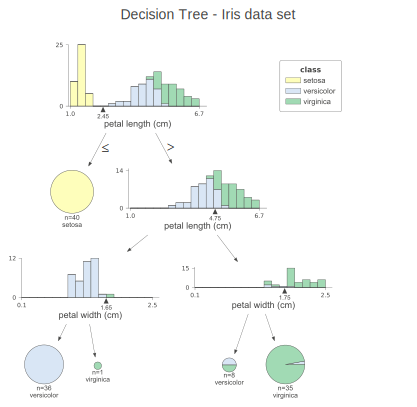

In [29]:
from dtreeviz.trees import *

# 准备数据
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 拟合
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

viz = dtreeviz(clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=dataset.feature_names, 
               class_names=list(dataset.target_names), 
               title="Decision Tree - Iris data set")
viz

## sns.heatmap可视化报告

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



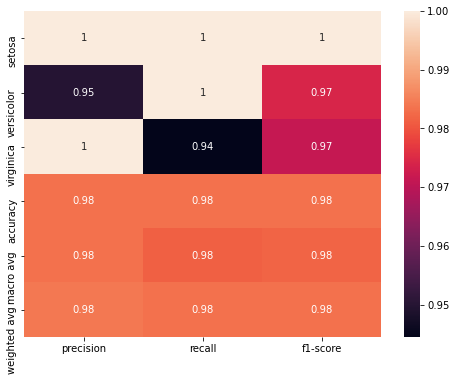

In [36]:
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import pandas as pd
y_pred = model.predict(X_test)
target_names = np.unique(dataset.target_names)
clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=labels,
                                   target_names=target_names)
print(clf_report)
clf_report = classification_report(y_test,
                                   y_pred,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
plt.figure(figsize=(8,6))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()